In [2]:
import time
import datetime

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

SEED = 260420010

In [3]:
df = pd.read_csv('../data/2_merged/merged_data.csv')
df = df.sample(frac=1, replace=False, random_state=SEED)

<Axes: >

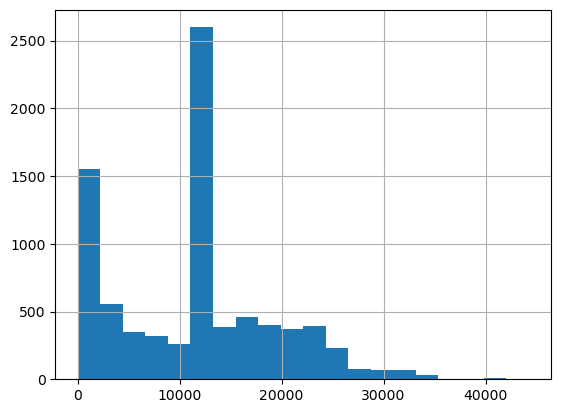

In [5]:
df['inst_age_in_days'].fillna(df['inst_age_in_days'].mean()).hist(bins=20)

In [16]:
def process_date(df: pd.DataFrame):
    df['case_date'] = df['case_date'].apply(lambda date: time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple()) / 86400)
    
    # uwzględniamy roczną cykliczność naszym danym 
    df['case_date_sin'] = np.sin(2*np.pi * df['case_date'] / 365)
    return df

In [17]:
df['INSTALLATION_YEAR'] = df['INSTALLATION_YEAR'].apply(lambda s: int(s.split('-')[0]) if type(s) is str else s)
df = process_date(df)

In [18]:
train_df = df.head(int(df.shape[0] * 0.6))
valid_df = df.tail(int(df.shape[0] * 0.2))
test_df = df.iloc[int(df.shape[0] * 0.6)+1: int(df.shape[0] * 0.8)]

In [19]:
nan_columns = df.columns[df.isna().any()].tolist()

if len(nan_columns) == 0:
        print("Nie ma wartości NaN w żadnej kolumnie.")
else:
    print("Kolumny zawierające wartości NaN:")
    print(nan_columns)

    # Obliczanie procentowego udziału wartości NaN w każdej kolumnie
    for col in nan_columns:
        nan_percentage = (df[col].isna().sum() / len(df)) * 100
        print(f"Procent NaN w kolumnie {col}: {nan_percentage:.2f}%")

Kolumny zawierające wartości NaN:
['INSTALLATION_YEAR', 'COMMODITY_RELEASED_TYPE', 'INTENTIONAL_RELEASE_BBLS', 'UNINTENTIONAL_RELEASE_BBLS', 'ON_OFF_SHORE', 'EXPLODE_IND', 'NUM_PUB_EVACUATED', 'FEDERAL', 'LOCATION_TYPE', 'CROSSING', 'ITEM_INVOLVED', 'MATERIAL_INVOLVED', 'EST_COST_OPER_PAID', 'EST_COST_GAS_RELEASED', 'EST_COST_PROP_DAMAGE', 'EST_COST_EMERGENCY', 'EST_COST_ENVIRONMENTAL', 'EST_COST_OTHER', 'NARRATIVE', 'SYSTEM_PART_INVOLVED', 'INCIDENT_AREA_TYPE', 'PIPE_FACILITY_TYPE', 'inst_age_in_days', 'RELEASE_TYPE', 'COULD_BE_HCA', 'ACCIDENT_PSIG', 'MOP_PSIG', 'PIPELINE_FUNCTION', 'SCADA_IN_PLACE_IND', 'INVESTIGATION_STATUS', 'EMPLOYEE_DRUG_TEST_IND', 'CONTRACTOR_DRUG_TEST_IND']
Procent NaN w kolumnie INSTALLATION_YEAR: 28.09%
Procent NaN w kolumnie COMMODITY_RELEASED_TYPE: 1.19%
Procent NaN w kolumnie INTENTIONAL_RELEASE_BBLS: 58.66%
Procent NaN w kolumnie UNINTENTIONAL_RELEASE_BBLS: 0.92%
Procent NaN w kolumnie ON_OFF_SHORE: 16.65%
Procent NaN w kolumnie EXPLODE_IND: 12.79%
Procen

## Uzupełnienie zmiennych

In [20]:
base_on = ['EST_COST_GAS_RELEASED', 'EST_COST_ENVIRONMENTAL', 'accident_pressure_as_%_mop_psig']

In [21]:
categorial_values = ['COMMODITY_RELEASED_TYPE', 'ON_OFF_SHORE', 'IGNITE_IND', 'EXPLODE_IND', 'FEDERAL', 'LOCATION_TYPE', 'CROSSING', 'MATERIAL_INVOLVED', 'INCIDENT_AREA_TYPE', 'PIPE_FACILITY_TYPE', 
                     'RELEASE_TYPE', 'COULD_BE_HCA', 'PIPELINE_FUNCTION', 'SCADA_IN_PLACE_IND', 'INVESTIGATION_STATUS', 'EMPLOYEE_DRUG_TEST_IND', 'CONTRACTOR_DRUG_TEST_IND', 'CAUSE']

In [22]:
mean_values = ['UNINTENTIONAL_RELEASE_BBLS', 'MOP_PSIG', 'EST_COST_PROP_DAMAGE', 'EST_COST_EMERGENCY', 'INSTALLATION_YEAR', 'ACCIDENT_PSIG']
zero_values = ['INTENTIONAL_RELEASE_BBLS', 'NUM_PUB_EVACUATED', 'EST_COST_OPER_PAID', 'EST_COST_OTHER']

In [23]:
without_NaN = ['ITEM_INVOLVED', 'SYSTEM_PART_INVOLVED']

In [24]:
deleted = ['CAUSE_DETAILS', 'NARRATIVE', 'zone', 'TAVG']

In [25]:
def process_data_numeric(input_df: pd.DataFrame):
    for col_name in categorial_values:
        mode_value = input_df[col_name].mode()[0]
        input_df[col_name] = input_df[col_name].fillna(mode_value)

    for col_name in mean_values:
        mean_value = input_df[col_name].mean()
        input_df[col_name] = input_df[col_name].fillna(mean_value)

    for col_name in zero_values:
        input_df[col_name] = input_df[col_name].fillna(0)

    for col_name in base_on:
        mean_value = input_df[col_name].mean()
        input_df[col_name] = input_df[col_name].fillna(mean_value)
    return input_df

In [26]:
df_classification = process_data_numeric(df)
df_classification.to_csv('../data/3_fill_nans/processed_data.csv', index=False)